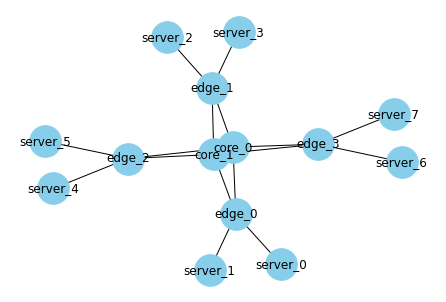

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_fat_tree(k):
    """
    Generate a 2-level Fat Tree topology with k ports per switch
    :param k: int, number of ports per switch
    :return: networkx.Graph, the generated fat tree
    """
    fat_tree = nx.Graph()

    num_core_switches = k // 2
    num_edge_switches = k
    num_servers = k * num_edge_switches // 2

    # Add core switches
    for i in range(num_core_switches):
        fat_tree.add_node(f'core_{i}', type='core_switch')

    # Add edge switches and connect them to core switches
    for i in range(num_edge_switches):
        edge_switch = f'edge_{i}'
        fat_tree.add_node(edge_switch, type='edge_switch')
        
        for j in range(num_core_switches):
            fat_tree.add_edge(edge_switch, f'core_{j}', type='switch_link')

    # Add servers and connect them to edge switches
    server_id = 0
    for i in range(num_edge_switches):
        edge_switch = f'edge_{i}'
        
        for _ in range(num_servers // num_edge_switches):
            server = f'server_{server_id}'
            fat_tree.add_node(server, type='server')
            fat_tree.add_edge(server, edge_switch, type='server_link')
            server_id += 1

    return fat_tree

def draw_fat_tree(fat_tree):
    """
    Draw a fat tree using networkx and matplotlib
    :param fat_tree: networkx.Graph, the fat tree to draw
    """
    pos = nx.spring_layout(fat_tree)
    nx.draw(fat_tree, pos, with_labels=True, node_color="skyblue", node_size=1000)
    plt.show()

k = 4  # Number of ports per switch
fat_tree = generate_fat_tree(k)
draw_fat_tree(fat_tree)